In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import torch
import random
import numpy as np

In [4]:
intermediate_ratio = [i/10 for i in range(2,11,2)]
attention_ratio = intermediate_ratio
depth = [i for i in range(4,25,4)]

In [2]:
latency_data = [{'d-4-ar-0.2-ir-1.0': 120.477738216, 'd-4-ar-0.4-ir-1.0': 132.18152763999998, 'd-4-ar-0.6-ir-1.0': 147.33087616, 'd-4-ar-0.8-ir-1.0': 161.331207, 'd-4-ar-1.0-ir-1.0': 170.601421592, 'd-8-ar-0.2-ir-1.0': 244.165002656, 'd-8-ar-0.4-ir-1.0': 263.978335592, 'd-8-ar-0.6-ir-1.0': 294.295929736, 'd-8-ar-0.8-ir-1.0': 320.863519888, 'd-8-ar-1.0-ir-1.0': 340.918566952, 'd-12-ar-0.2-ir-1.0': 365.927913736, 'd-12-ar-0.4-ir-1.0': 395.467794632, 'd-12-ar-0.6-ir-1.0': 441.040457112, 'd-12-ar-0.8-ir-1.0': 480.862237064, 'd-12-ar-1.0-ir-1.0': 510.47305440800005, 'd-16-ar-0.2-ir-1.0': 487.695855112, 'd-16-ar-0.4-ir-1.0': 526.6475362, 'd-16-ar-0.6-ir-1.0': 587.4324161999999, 'd-16-ar-0.8-ir-1.0': 640.777925984, 'd-16-ar-1.0-ir-1.0': 680.399604904, 'd-20-ar-0.2-ir-1.0': 609.0804834, 'd-20-ar-0.4-ir-1.0': 657.473734896, 'd-20-ar-0.6-ir-1.0': 733.936949432, 'd-20-ar-0.8-ir-1.0': 800.95931464, 'd-20-ar-1.0-ir-1.0': 850.19245272, 'd-24-ar-0.2-ir-1.0': 730.4642201759999, 'd-24-ar-0.4-ir-1.0': 788.681458768, 'd-24-ar-0.6-ir-1.0': 880.070379136, 'd-24-ar-0.8-ir-1.0': 960.703067608, 'd-24-ar-1.0-ir-1.0': 1019.362143824}, {'d-24-ar-0.2-ir-0.2': 272.79616462399997, 'd-24-ar-0.4-ir-0.2': 331.110269088, 'd-24-ar-0.6-ir-0.2': 421.95927536, 'd-24-ar-0.8-ir-0.2': 501.881630256, 'd-24-ar-1.0-ir-0.2': 560.58377584, 'd-24-ar-0.2-ir-0.4': 383.67546292, 'd-24-ar-0.4-ir-0.4': 441.636793088, 'd-24-ar-0.6-ir-0.4': 532.390663768, 'd-24-ar-0.8-ir-0.4': 613.465436832, 'd-24-ar-1.0-ir-0.4': 672.067845928, 'd-24-ar-0.2-ir-0.6': 503.569001224, 'd-24-ar-0.4-ir-0.6': 561.5377893919999, 'd-24-ar-0.6-ir-0.6': 652.353598032, 'd-24-ar-0.8-ir-0.6': 732.61480912, 'd-24-ar-1.0-ir-0.6': 791.808348608, 'd-24-ar-0.2-ir-0.8': 619.476354544, 'd-24-ar-0.4-ir-0.8': 677.6696058, 'd-24-ar-0.6-ir-0.8': 768.884742392, 'd-24-ar-0.8-ir-0.8': 849.911897696, 'd-24-ar-1.0-ir-0.8': 908.497877432, 'd-24-ar-0.2-ir-1.0': 730.537553344, 'd-24-ar-0.4-ir-1.0': 789.035515448, 'd-24-ar-0.6-ir-1.0': 880.5022611439999, 'd-24-ar-0.8-ir-1.0': 961.1254044}, {'d-4-ar-1.0-ir-0.2': 94.740676352, 'd-8-ar-1.0-ir-0.2': 188.183427304, 'd-12-ar-1.0-ir-0.2': 281.652968536, 'd-16-ar-1.0-ir-0.2': 374.993294472, 'd-20-ar-1.0-ir-0.2': 468.124296496, 'd-24-ar-1.0-ir-0.2': 560.8208823360001, 'd-4-ar-1.0-ir-0.4': 113.319822176, 'd-8-ar-1.0-ir-0.4': 225.18203264000002, 'd-12-ar-1.0-ir-0.4': 337.149970728, 'd-16-ar-1.0-ir-0.4': 449.103923376, 'd-20-ar-1.0-ir-0.4': 560.601458824, 'd-24-ar-1.0-ir-0.4': 671.498569072, 'd-4-ar-1.0-ir-0.6': 133.428998984, 'd-8-ar-1.0-ir-0.6': 265.11206526399997, 'd-12-ar-1.0-ir-0.6': 396.905147864, 'd-16-ar-1.0-ir-0.6': 528.7233614639999, 'd-20-ar-1.0-ir-0.6': 660.472697256, 'd-24-ar-1.0-ir-0.6': 791.9882373600001, 'd-4-ar-1.0-ir-0.8': 152.300702328, 'd-8-ar-1.0-ir-0.8': 303.558326216, 'd-12-ar-1.0-ir-0.8': 454.587565832, 'd-16-ar-1.0-ir-0.8': 605.604207664, 'd-20-ar-1.0-ir-0.8': 756.942762432, 'd-24-ar-1.0-ir-0.8': 908.340466272, 'd-4-ar-1.0-ir-1.0': 170.562291056, 'd-8-ar-1.0-ir-1.0': 340.476409128, 'd-12-ar-1.0-ir-1.0': 510.125263184, 'd-16-ar-1.0-ir-1.0': 680.1049897839999, 'd-20-ar-1.0-ir-1.0': 849.6032047360001}]

In [3]:
depth_attention,attention_intermediate,depth_intermediate=latency_data

In [5]:
data = []
for d in depth:
    attention_data=[]
    for a in attention_ratio:
        name = "d-"+str(d)+"-ar-"+str(a)+"-ir-"+str(1.0)
        attention_data.append(depth_attention[name])
    data.append(attention_data)

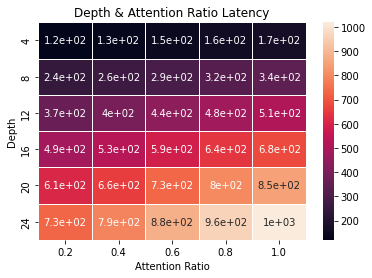

In [12]:
plt.clf()
ax = sns.heatmap(data,  linewidth=0.5,xticklabels=attention_ratio, yticklabels=depth,annot=True)
ax.set_xlabel('Attention Ratio')
ax.set_ylabel('Depth')
plt.title("Depth & Attention Ratio Latency")
plt.savefig("depth_attention_latency_heatmap.png")


In [15]:
data = []
for i in intermediate_ratio:
    attention_data=[]
    for a in attention_ratio:
        name = "d-"+str(24)+"-ar-"+str(a)+"-ir-"+str(i)
        if name == "d-24-ar-1.0-ir-1.0":
            attention_data.append(depth_attention[name])
            continue
        attention_data.append(attention_intermediate[name])
    data.append(attention_data)
            

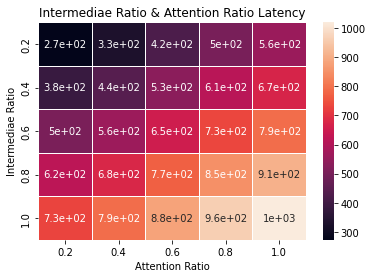

In [16]:
plt.clf()
ax = sns.heatmap(data,  linewidth=0.5,xticklabels=attention_ratio, yticklabels=intermediate_ratio,annot=True)
ax.set_xlabel('Attention Ratio')
ax.set_ylabel('Intermediae Ratio')
plt.title("Intermediae Ratio & Attention Ratio Latency")
plt.savefig("intermediate_attention_latency_heatmap.png")


In [17]:
data = []
for d in depth:
    attention_data=[]
    for i in intermediate_ratio:
        name = "d-"+str(d)+"-ar-"+str(1.0)+"-ir-"+str(i)
        if name == "d-24-ar-1.0-ir-1.0":
            attention_data.append(depth_attention[name])
            continue
        attention_data.append(depth_intermediate[name])
    data.append(attention_data)

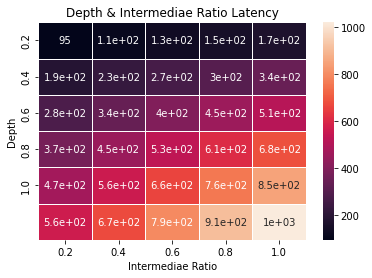

In [19]:
plt.clf()
ax = sns.heatmap(data,  linewidth=0.5,xticklabels=attention_ratio, yticklabels=intermediate_ratio,annot=True)
ax.set_xlabel('Intermediae Ratio')
ax.set_ylabel('Depth')
plt.title("Depth & Intermediae Ratio Latency")
plt.savefig("depth_intermediate_latency_heatmap.png")
